<a href="https://colab.research.google.com/github/ceyxasm/ml/blob/main/Error_analysis_%26_multilabel_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [3]:
x , y= mnist.data, mnist.target
print(x.shape, y.shape)

import numpy as np
x=np.array(x)
y=np.array(y)

(70000, 784) (70000,)


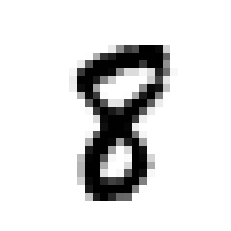

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = x[69420]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y = y.astype(np.uint8)
x_train, x_test, y_train, y_test= x[:60000], x[60000:], y[:60000], y[60000:]

In [6]:


## we venture out starting with SGD which is also good for ONLINE LEARNING!!!
from sklearn.linear_model import SGDClassifier
clf= SGDClassifier(random_state=42)
clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [7]:
res=clf.predict([some_digit])
print(res)
print(clf.decision_function([some_digit])[:])

## training models is similar to what we did in binary classification

[8]
[[-39164.18285973 -24207.10118573  -6349.89125681  -7137.68305598
  -15285.79591773  -5940.77782984 -27749.6212119  -23518.37670617
    3202.46485711  -7338.48333191]]


ERROR ANALYSIS

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

from sklearn.model_selection import cross_val_score

cross_val_score(clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
print(cross_val_score)

<function cross_val_score at 0x7f10ad7604d0>


In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


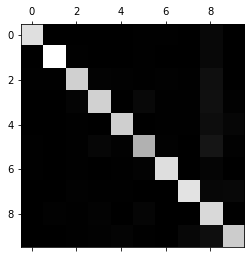

In [10]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

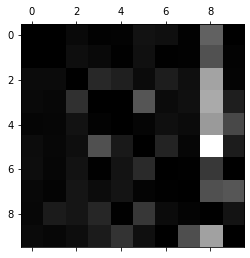

In [11]:
## Let’s focus the plot on the errors. First, you need to divide each value in the confusion
## matrix by the number of images in the corresponding class, so you can compare error
## rates instead of absolute number of errors (which would make abundant classes look
## unfairly bad)

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
## clearly efforts should be made to reduce the false 8s          
## more descriptively, we can get more training data with points that look like 8 but are not 8

**MULTILABEL CLASSIFICATION**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

In [13]:
from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv=3)
print(f1_score(y_multilabel, y_train_knn_pred, average="macro"))


0.976410265560605
